# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

### Загрузите данные из файла в датафрейм.
**Импортирую библиотеку pandas. Считываю данные из csv-файла в датафрейм и сохраняю в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('Datasets/real_estate_data.csv')
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

**Выведем первые 5 строчек датафрейма `data` на экран.**

In [30]:
data.head(5)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


**Разлепим данные, которые склеились.**

In [31]:
try:
    data = pd.read_csv('Datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Изучите общую информацию о полученном датафрейме.
**Выводим основную информацию о датафрейме с помощью метода `info()`.**

In [32]:
data.info

<bound method DataFrame.info of        total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartmen

### Постройте общую гистограмму для всех столбцов таблицы. 

Строим диаграмму для каждого столбца таблицы.

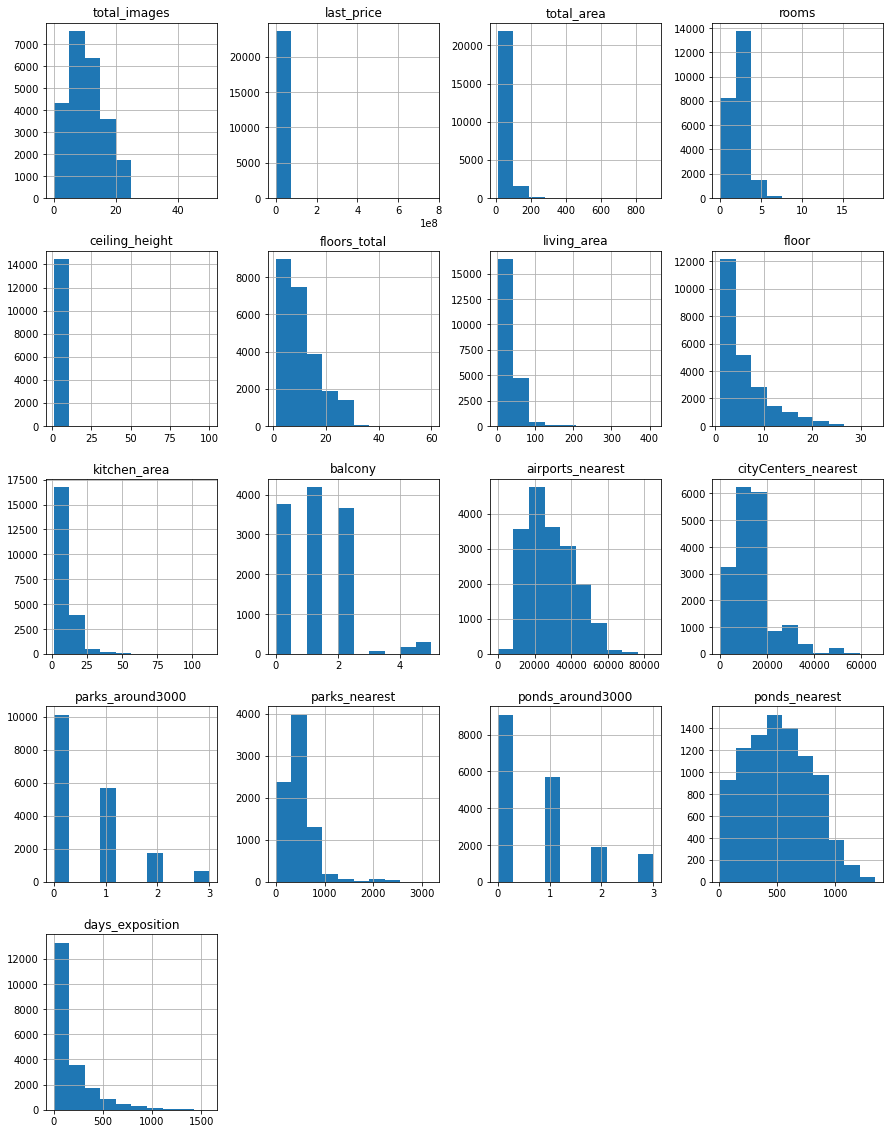

In [33]:
data.hist(figsize=(15, 20))
plt.show()

## Предобработка данных

### 1. Найдите и изучите пропущенные значения в столбцах:
Определим, в каких столбцах есть пропуски.
Заполним пропущенные значения там, где это возможно. 
Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [34]:
data=data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
#заменим шрифт в описании столбца - единственный столбец, который выбивается

 Выведем количество пропущенных значений для каждого столбца. 

In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вот какие данные оказались пропущены:
- ceiling_height           9195 — высота потолков (м)
- floors_total               86 — всего этажей в доме
- living_area              1903 — жилая площадь в квадратных метрах (м²)
- is_apartment            20924 — апартаменты (булев тип)
- kitchen_area             2278 — площадь кухни в квадратных метрах (м²)
- balcony                 11519 — число балконов
- locality_name              49 — название населённого пункта
- airports_nearest         5542 — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest      5519 — расстояние до центра города (м)
- parks_around3000         5518 — число парков в радиусе 3 км
- parks_nearest           15620 — расстояние до ближайшего парка (м)
- ponds_around3000         5518 — число водоёмов в радиусе 3 км
- ponds_nearest           14589 — расстояние до ближайшего водоёма (м)
- days_exposition          3181— сколько дней было размещено объявление (от публикации до снятия)

Логично предположить, также, как и для балкона: если продавец не указал, что квартира является апартаментом, что рядом есть парк или пруд, вероятно, что это не так, и поэтому продавец опустил эту информацию.
    

In [36]:
column_name = ['is_apartment','balcony','parks_around3000','ponds_around3000']

for t in column_name:
    print(t)
    data[t].unique()
    print(data[t].unique())
print()

is_apartment
[nan False True]
balcony
[nan  2.  0.  1.  5.  4.  3.]
parks_around3000
[ 1.  0.  2. nan  3.]
ponds_around3000
[ 2.  0.  3.  1. nan]



В этих данных если продавец не указал является ли квартира апартаментом, то вероятно предполодить, что не вявляется.
Можно заменить пустые значение на False.
Если не указано число балконов, количество парков или прудов, то, скорее всего, балконов, парков и прудовв нет - 
Пропуски можно заменить на 0.

In [37]:
for t in column_name:
    if t != 'is_apartment':
        data[t] = data[t].fillna(value=0)
    else: 
        data[t] = data[t].fillna(value=False)
    print(data[t].head())
    print()



0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

0    0.0
1    2.0
2    0.0
3    0.0
4    0.0
Name: balcony, dtype: float64

0    1.0
1    0.0
2    1.0
3    2.0
4    2.0
Name: parks_around3000, dtype: float64

0    2.0
1    0.0
2    2.0
3    3.0
4    1.0
Name: ponds_around3000, dtype: float64



Для остальных пропусков нельзя предположить логичной замены. 
Вероятнее всего, пропуски в данных связаны с темб что продавцы пропускали необязательные поля при заполнении.

#### Рассмотрим типы данных в каждом столбце.

Заменим тип данных в столбце **last_price** на целочисленный.

In [38]:
data['last_price']= data['last_price'].astype(int)

Стоблец с датой **first_day_exposition** читается как object, нужно изменить тип данных на datetime64.

In [39]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

print(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


Теперь хорошо :) 
Для того, чтобы можно было производить действия со временем (округлять часы, переводить часовой пояс) и тому подобное, необходимо, чтобы тип данных соответствовал.

#### Удаление дубликатов
Посмотрим, есть ли дубликаты и уберём их.

In [40]:
data.duplicated().sum()

0

Явных дубликатов нет, посмотрим уникальные значения в столбце с названиями и уберем неявные дубликаты. 
Выведем на экран перечень уникальных названий из столбца **locality_name**.
Замечаем, что у части названий фигурирует **ё**, заменим на **е**, а затем уберем административную единицу из названий, чтобы разное наименование не созддавало дубликат.

In [41]:
list(data['locality_name'].sort_values().unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [42]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [43]:
word_list = [ 'поселок при железнодорожной станции ', 'деревня ',  'коттеджный поселок ', \
             'поселок городского типа имени ', 'поселок городского типа ',  'поселок станции ' , \
             'садоводческое некоммерческое товарищество ',  'садовое товарищество ',\
             'городской поселок ', 'поселок ','село ']
for word in word_list:
    data['locality_name'] = data['locality_name'].str.replace(word,'')

In [44]:
list(data['locality_name'].sort_values().unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Калитино',

#### Найдем выбивающиеся значения.
В столбце ceiling_height указана высота потолков 25 м и 32 м. 

Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м.

Вероятно, в некоторых местах съехала точка: 14, 20, 24, 25, 26, 32 м и тп. Заменим значения выше 10 на значение, кратное 10, чтобы исправить ошибку.

In [45]:
list(data['ceiling_height'].sort_values().unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

In [46]:
data.loc[data['ceiling_height'] >10, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'] = data['ceiling_height'].round(2)
print(data['ceiling_height'].median())
#видим, что медианное значение - 2,65. Отбросив выбивающиеся значения мы не потеряем в качестве данных.

2.65


Посмотрим распределение аномальных значений, ччтобы увидеть распределение значений и отсечь аномалии. 

На графике видно, что большая чать значений находится в диапахоне между 2,5 - 3, есть также много значений около 3,
далее данные выглядят как вброс.
Свыше 3,6 и ниже 2,1 можно отбрасывать значения, заменив их на медианное.
Медианным же значением заполним пропуски.

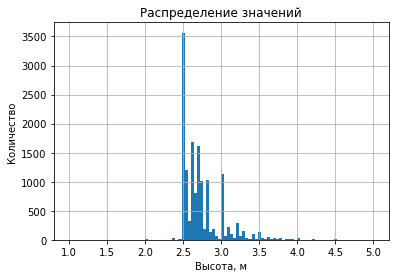

In [47]:
data['ceiling_height'].hist(bins=100, range=(1,5))
plt.title('Распределение значений')
plt.xlabel('Высота, м')
plt.ylabel('Количество')
plt.show()

In [48]:
data.loc[data['ceiling_height']> 3.6,'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] <2.1, 'ceiling_height'] = data['ceiling_height'].median()
#data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

list(data['ceiling_height'].sort_values().unique())

[2.2,
 2.25,
 2.26,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 nan]

Посмотрим на распределение значений в графе дней размещения, цены, комнат и общей площади.
На графике видно, что у цены и у дней экспозиции очень большие хвосты, а акже, что есть аномальные значения по площади и по количеству комнат.

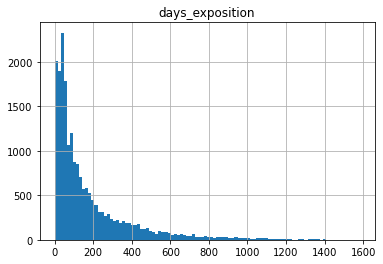

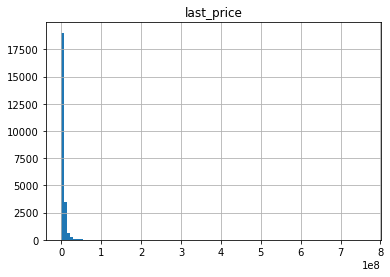

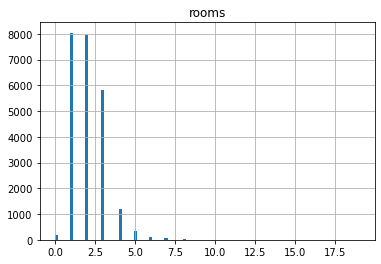

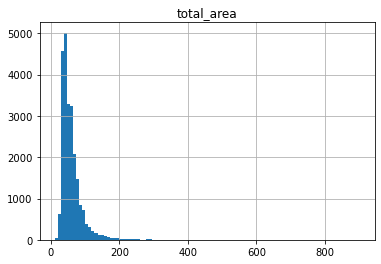

In [49]:
columns = ['days_exposition','last_price','rooms','total_area']
def show_hist(columns_name):
    for column in columns_name:
        data[column].hist(bins=100, range=(data[column].min(),data[column].max()))
        plt.title(column)
        plt.show()       
show_hist(columns)

Посмотрим количество аномальных значенийб медианное значение и количество пропусков.
Видим, что пропуски есть только у дней, но пропуск может означать, что помещение ещё не сдали. 
Избавимся от выбивающихся ззначений.

In [50]:
print('Количество значений для столбца Дни экспозции свыше 1400:',data.query('days_exposition > 1400')['floor'].count())
print('Количество значений для столбца Последняя цена свыше 1.5 млн:',data.query('last_price > 150000000')['floor'].count())
print('Количество значений для столбца Комнаты свыше 7:',data.query('rooms > 7')['floor'].count())
print('Количество значений для столбца общая площадь свыше 400:',data.query('total_area > 400')['floor'].count())

Количество значений для столбца Дни экспозции свыше 1400: 19
Количество значений для столбца Последняя цена свыше 1.5 млн: 15
Количество значений для столбца Комнаты свыше 7: 31
Количество значений для столбца общая площадь свыше 400: 23


In [51]:
for column in columns:
    print(f'Количество пропусков в стобце {column}:{data[column].isna().sum()}')
print()
for column in columns:
    print(f'Медианное значение {column}:{data[column].median()}')

Количество пропусков в стобце days_exposition:3181
Количество пропусков в стобце last_price:0
Количество пропусков в стобце rooms:0
Количество пропусков в стобце total_area:0

Медианное значение days_exposition:95.0
Медианное значение last_price:4650000.0
Медианное значение rooms:2.0
Медианное значение total_area:52.0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [53]:
data = data.query('(days_exposition.isna() | days_exposition < 1401) and last_price<150000001 and rooms<=7 and total_area<401',engine='python')

In [54]:
#data.loc[data['days_exposition']> 1400,'days_exposition'] = data['days_exposition'].median()
#data.loc[data['last_price']> 150000000,'last_price'] = data['last_price'].median()
#data.loc[data['rooms']> 7,'rooms'] = data['rooms'].median()
#data.loc[data['total_area']> 400,'total_area'] = data['total_area'].median()
for column in columns:
    print(f'Медианное значение {column}:{data[column].median()}')

Медианное значение days_exposition:95.0
Медианное значение last_price:4600000.0
Медианное значение rooms:2.0
Медианное значение total_area:52.0


## Посчитайте и добавьте в таблицу новые столбцы

Для расчёта новых стобцов применим функцию (для расчета типа этажа квартиры; значения — «первый», «последний», «другой»).
Для расчёта и записи других - цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления;год публикации объявления; расстояние до центра города в километрах (в м) - расчёты. 
Новую таблицу выведем на экран.

In [55]:
def floor_typing(row):
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] ==  row['floors_total']:
            return 'последний'
        else:
            return 'другой'

data['floor_type'] = data.apply(floor_typing, axis=1)

Добавим новые столбцы и построим таблицу.

<h4>Комментарий студента</h4>
Спасибо - так элегантнее, исправила.
</div>

In [56]:
data['meter_price'] = round(data['last_price']/ data['total_area'],2)
data['week_day'] = data['first_day_exposition'].dt.weekday 
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['distance_in_km'] = round(data['city_centers_nearest']/1000,0)
#Добавим значения в млн, для более легкого визуального предсьтавления данных
data['last_price_mil'] = round(data['last_price']/1000000,3)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,floor_type,meter_price,week_day,month,year,distance_in_km,last_price_mil
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2.0,755.0,NaN,другой,120370.37,3,3,2019,16.0,13.000
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,0.0,NaN,81.0,первый,82920.79,1,12,2018,19.0,3.350
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,2.0,574.0,558.0,другой,92785.71,3,8,2015,14.0,5.196
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,другой,408176.10,4,7,2015,7.0,64.900
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,1.0,48.0,121.0,другой,100000.00,1,6,2018,8.0,10.000
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,0.0,NaN,55.0,другой,95065.79,0,9,2018,NaN,2.890
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,0.0,NaN,155.0,другой,99195.71,3,11,2017,19.0,3.700
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,0.0,NaN,NaN,другой,110544.69,3,4,2019,12.0,7.915
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,0.0,NaN,189.0,другой,87454.76,2,5,2018,NaN,2.900
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,289.0,другой,88524.59,6,2,2017,15.0,5.400


### Проведите исследовательский анализ данных

#### Изучим следующие параметры объектов:
- общая площадь (total_area — общая площадь квартиры в квадратных метрах (м²))
- жилая площадь (living_area — жилая площадь в квадратных метрах (м²))
- площадь кухни (kitchen_area — площадь кухни в квадратных метрах (м²))
- цена объекта (last_price — цена на момент снятия с публикации)
- количество комнат (rooms — число комнат)
- высота потолков (ceiling_height — высота потолков (м))
- этаж квартиры (floor — этаж)
- тип этажа квартиры (floor_type «первый», «последний», «другой»)
- общее количество этажей в доме(floors_total — всего этажей в доме)
- расстояние до центра города в метрах (city_centers_nearest — расстояние до центра города (м))
- расстояние до ближайшего аэропорта (airports_nearest — расстояние до ближайшего аэропорта в метрах (м))
- расстояние до ближайшего парка (parks_nearest — расстояние до ближайшего парка (м))
- день и месяц публикации объявления (week_day и month)


Построим отдельные гистограммы для каждого из этих параметров, а также другие важные характеристики.

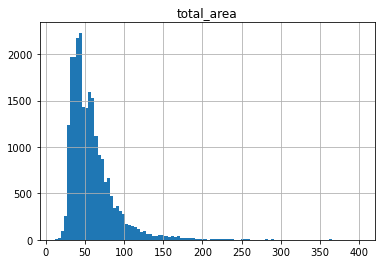

count    23619.000000
mean        59.548460
std         31.406545
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        400.000000
Name: total_area, dtype: float64

Медианное значение total_area:52.0

Среднее значение total_area:59.54845971463634

Количество пропусков в стобце total_area:0


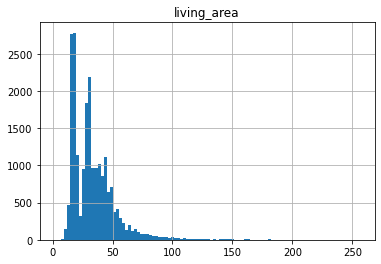

count    21724.000000
mean        34.022901
std         19.992245
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        255.700000
Name: living_area, dtype: float64

Медианное значение living_area:30.0

Среднее значение living_area:34.02290100865371

Количество пропусков в стобце living_area:1895


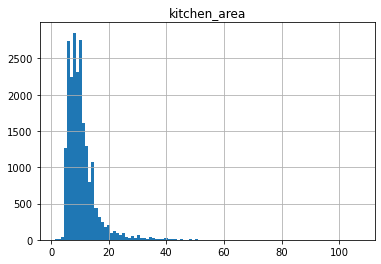

count    21350.000000
mean        10.509787
std          5.706466
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Медианное значение kitchen_area:9.1

Среднее значение kitchen_area:10.509787353630005

Количество пропусков в стобце kitchen_area:2269


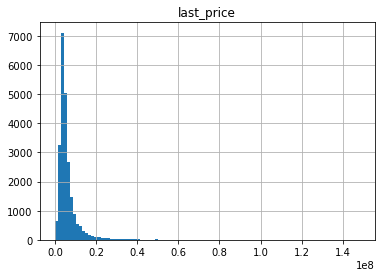

count    2.361900e+04
mean     6.279525e+06
std      7.015772e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      1.480000e+08
Name: last_price, dtype: float64

Медианное значение last_price:4600000.0

Среднее значение last_price:6279525.037173462

Количество пропусков в стобце last_price:0


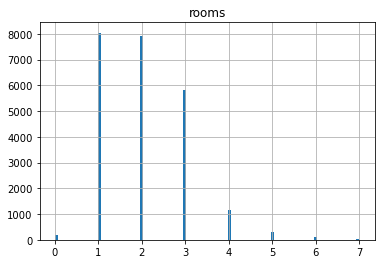

count    23619.000000
mean         2.055760
std          1.028174
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Медианное значение rooms:2.0

Среднее значение rooms:2.055760193064905

Количество пропусков в стобце rooms:0


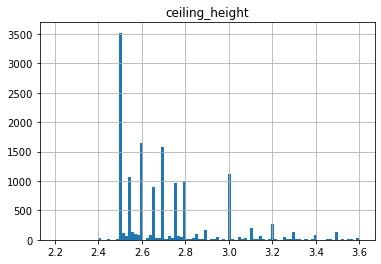

count    14449.000000
mean         2.707636
std          0.228767
min          2.200000
25%          2.510000
50%          2.650000
75%          2.800000
max          3.600000
Name: ceiling_height, dtype: float64

Медианное значение ceiling_height:2.65

Среднее значение ceiling_height:2.70763582254823

Количество пропусков в стобце ceiling_height:9170


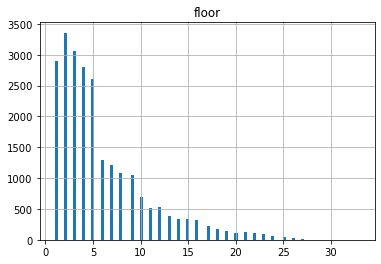

count    23619.000000
mean         5.895296
std          4.888034
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Медианное значение floor:4.0

Среднее значение floor:5.89529615987129

Количество пропусков в стобце floor:0


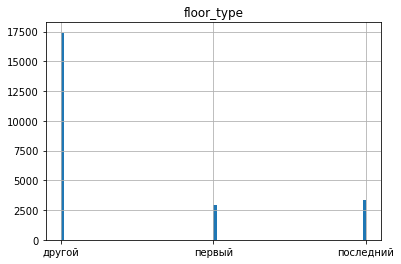

count      23619
unique         3
top       другой
freq       17402
Name: floor_type, dtype: object



Тип данных колонки floor_type не позволяет произвести вычисления


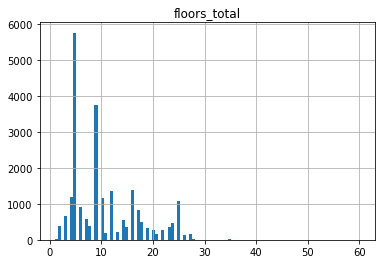

count    23533.000000
mean        10.685845
std          6.600118
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Медианное значение floors_total:9.0

Среднее значение floors_total:10.685845408575192

Количество пропусков в стобце floors_total:86


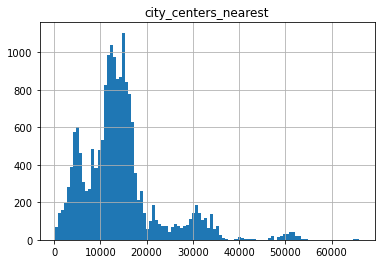

count    18103.000000
mean     14218.721759
std       8601.316116
min        181.000000
25%       9283.000000
50%      13118.000000
75%      16298.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Медианное значение city_centers_nearest:13118.0

Среднее значение city_centers_nearest:14218.721758824504

Количество пропусков в стобце city_centers_nearest:5516


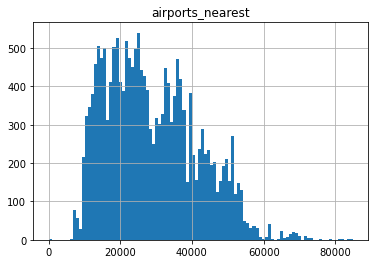

count    18082.000000
mean     28804.150868
std      12642.897396
min          0.000000
25%      18573.000000
50%      26757.000000
75%      37288.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Медианное значение airports_nearest:26757.0

Среднее значение airports_nearest:28804.150868266785

Количество пропусков в стобце airports_nearest:5537


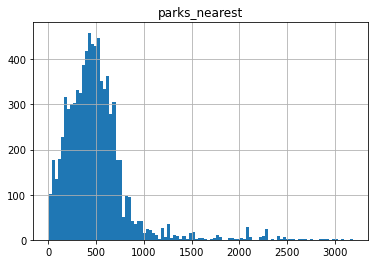

count    8023.000000
mean      490.878973
std       342.256898
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Медианное значение parks_nearest:455.0

Среднее значение parks_nearest:490.8789729527608

Количество пропусков в стобце parks_nearest:15596


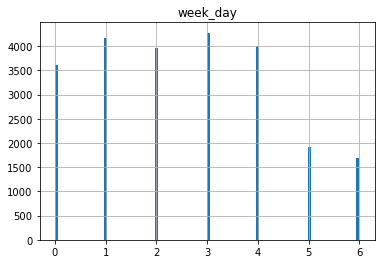

count    23619.000000
mean         2.569880
std          1.789254
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day, dtype: float64

Медианное значение week_day:3.0

Среднее значение week_day:2.569880181210043

Количество пропусков в стобце week_day:0


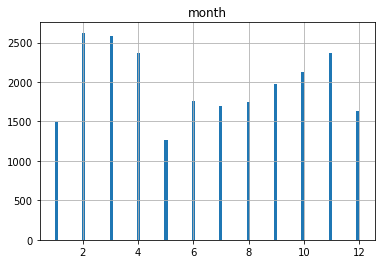

count    23619.000000
mean         6.401838
std          3.489961
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

Медианное значение month:6.0

Среднее значение month:6.401837503704645

Количество пропусков в стобце month:0


In [57]:
columns_to_describe = ['total_area', 'living_area', 'kitchen_area','last_price', 'rooms', 'ceiling_height','floor',
                      'floor_type', 'floors_total', 'city_centers_nearest','airports_nearest', 'parks_nearest',  
                       'week_day', 'month']

def columns_description (col_list):
    for column in col_list:
        try:
            data[column].hist(bins=100, range=(data[column].min(),data[column].max()))
            plt.title(column)
            plt.show()  
            print(data[column].describe())
            print()
            print(f'Медианное значение {column}:{data[column].median()}')
            print()
            print(f'Среднее значение {column}:{data[column].mean()}')
            print()
            print(f'Количество пропусков в стобце {column}:{data[column].isna().sum()}')
        except:
            print()
            print()
            print(f'Тип данных колонки {column} не позволяет произвести вычисления')
columns_description(columns_to_describe)             

Видим, что, несмотря на разброс значений, выстраивается общее представление о типичной квартире, которую выставляют на сдачу.
Общая площадь сдваваемых квартир - обычно от 40 до 68.5 квадратных метров. Жилая площадь - от 18.6 до 42.3б а площадь кухни - от 7 до 12 квадратных метров. 
Обычно продаются по цене от 3.4 и 6.7 млн. 
В объявлениях чаще фигурируют квартиры от 1 до 3х  комнат. Высота потолка - от 2.52 до 2 8 метров, этаж - от 2 до 8ой. Как правило, квартиры находятся в 9 - 16 км от центра и 18-37 км от аэропорта и 288-612 метров от центра. Сдают обычно с марта по октябрь
График для типа этажа не очень наглядный, посмотрим его отдельно.

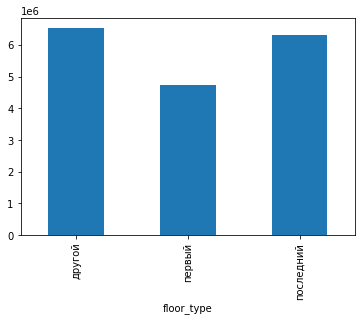

In [58]:
data.groupby('floor_type')['last_price'].mean().plot.bar()
plt.show()

Видим, что чаще сдаются квартиры на последнем и другом этаже.

#### Изучение времени продажи квартиры.

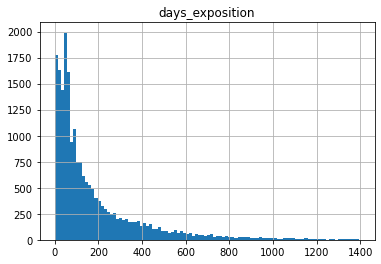

count    20452.000000
mean       179.370282
std        215.815906
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1396.000000
Name: days_exposition, dtype: float64

Медианное значение days_exposition:95.0

Среднее значение days_exposition:179.37028163504792

Количество пропусков в стобце days_exposition:3167


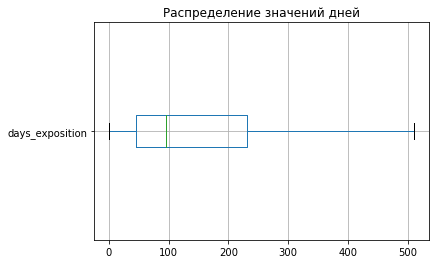

In [59]:
decsription_row = ['days_exposition']
columns_description(decsription_row)

data.boxplot(['days_exposition'], vert=False,showfliers=False)
plt.title('Распределение значений дней')
plt.show()

Чтобы изучить время продажи квартиры, можно посмотреть столбец days_exposition.
Этот параметр показывает, сколько дней было размещено каждое объявление.
Поо гистограмме и по описанию видно, что основные значение находятся в итнтервале от 45 до 206 дней.
Среднее значение - 154 дня, медианное - 95. 
Получается, что у большинства пользователей на продажу уходит от 1,5 месяца до 7 месяцев. 
Продаюа до этого времени - редкость, но случается, продаже выше этой отметки - долгие продажи.
Причем в стобце 3181 пропусков, что может значить, что это также непроданные квартиры.


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим данные по цене. 

count    23619.000000
mean         6.279525
std          7.015772
min          0.012000
25%          3.400000
50%          4.600000
75%          6.750000
max        148.000000
Name: last_price_mil, dtype: float64


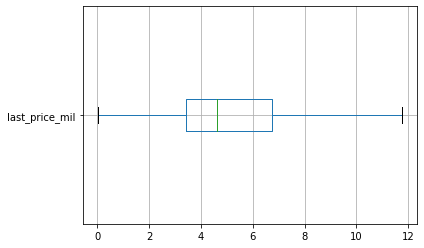

In [60]:
data.boxplot(['last_price_mil'], vert=False,showfliers=False)
print(data['last_price_mil'].describe())

Видим, что очень большой разброс цен. 
Какие наиболее вероятные факторы влияния: 
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Подготовимм анализ корреляции по эти данным.

Построим корреляцию для таблицы и выведем на экран.

In [61]:
corr = data.corr()
corr['last_price'].sort_values().round(3)

distance_in_km         -0.282
city_centers_nearest   -0.282
ponds_nearest          -0.115
year                   -0.057
studio                 -0.036
airports_nearest       -0.034
parks_nearest          -0.019
open_plan              -0.012
week_day               -0.000
floors_total            0.001
month                   0.006
balcony                 0.009
floor                   0.029
is_apartment            0.030
days_exposition         0.118
total_images            0.133
parks_around3000        0.270
ponds_around3000        0.270
ceiling_height          0.411
rooms                   0.435
kitchen_area            0.569
living_area             0.648
total_area              0.739
meter_price             0.744
last_price_mil          1.000
last_price              1.000
Name: last_price, dtype: float64

Замечаем высокую зависимость c самой собой, с ценой в млн(поскольку она создана из той же общей стоимости, цену за метр (при создании этой переменной участвовала цена), достаточно высокие показатели по жилым площадям ('total_area', 'living_area', 'kitchen_area').
Постороим график ззависимости цены от разных вариантов площади - по графику видно, что наиболее выраженная связь у цены с полной площадью.

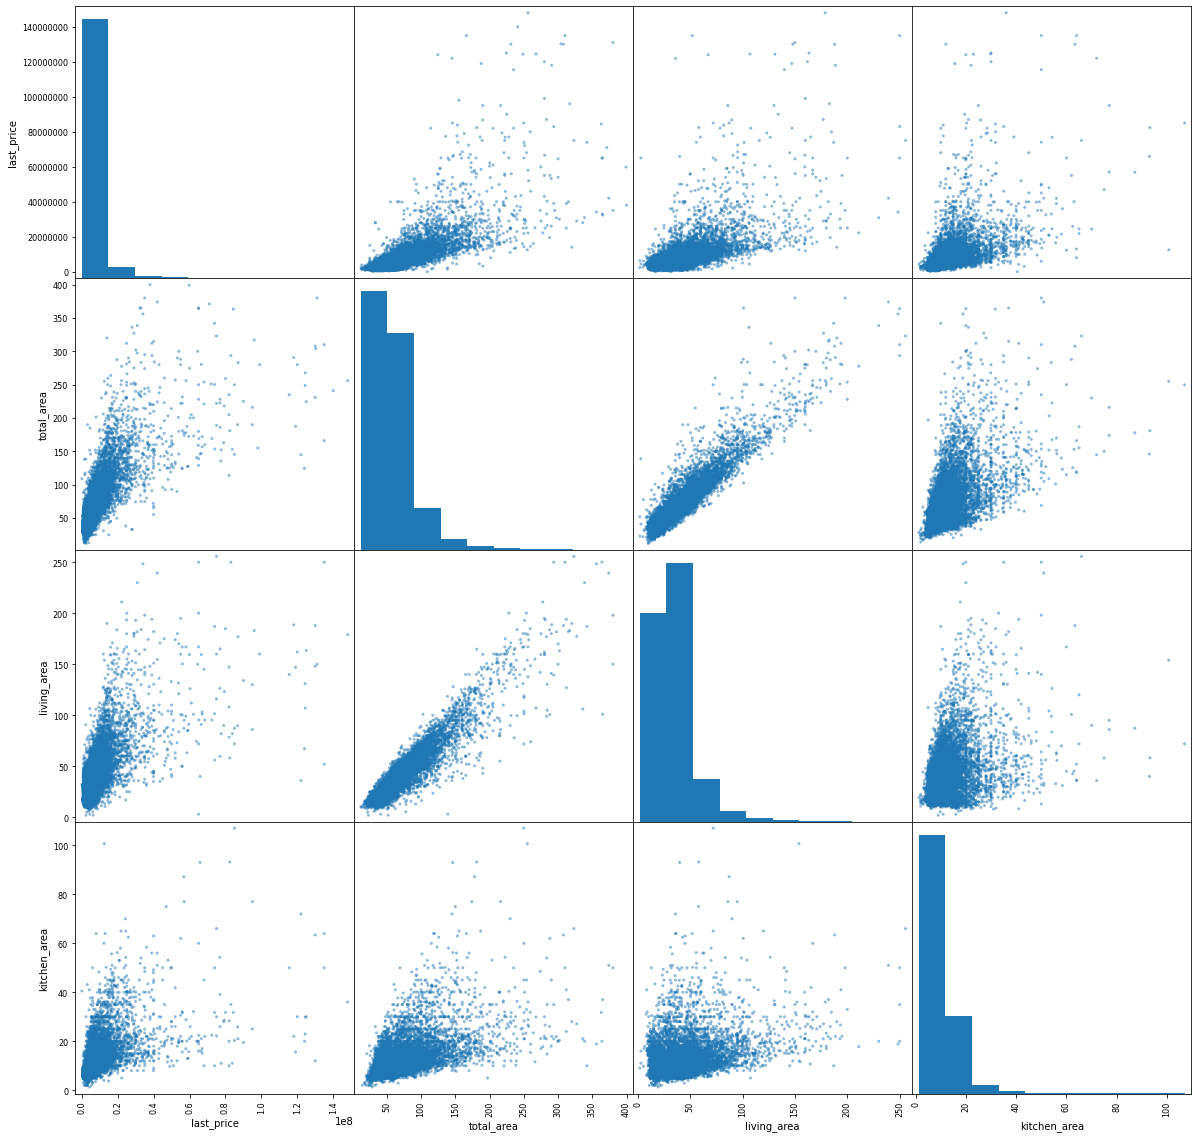

In [62]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area']], figsize=(20, 20));

   year  last_price
0  2014   7540000.0
1  2015   5300000.0
2  2016   4500000.0
3  2017   4500000.0
4  2018   4550000.0
5  2019   5048500.0


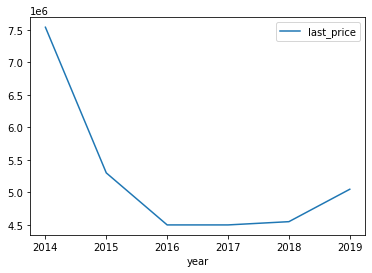

In [63]:
year_corr = data.groupby('year')['last_price'].agg('median').reset_index()
year_corr.plot('year','last_price')

print (year_corr.head(10))


Построим такие же графики для других переменных.

Прослеживается связь с днём недели (за исключением понедельника, который выбивается) - получается что с ходом недели цена снижается.
Зависимости между месяцем и ценой не видно. Видно, что лето - самый благоприятный с точки зрения низких цен период.
Количчесвто комнат любопытным образом показывают практически идеальную корреляцию - видимо, в этот параметр незаметным образом "пролезает" и общая площадь.
Количество балконов также влияют значительно - чем больше балконов, тем дороже стоимость.
Видим, что чаще сдаются квартиры на последнем и другом этаже.

Расчёт для month

               month  last_price
month       1.000000    0.082787
last_price  0.082787    1.000000



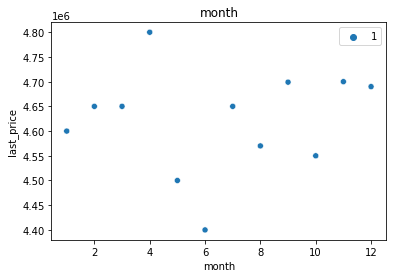


Расчёт для week_day

            week_day  last_price
week_day    1.000000   -0.848695
last_price -0.848695    1.000000



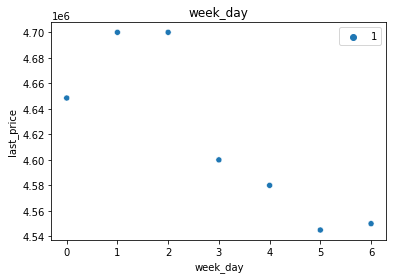


Расчёт для rooms

               rooms  last_price
rooms       1.000000    0.961616
last_price  0.961616    1.000000



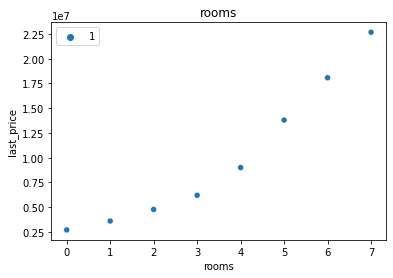


Расчёт для floor_type

            last_price
last_price         1.0



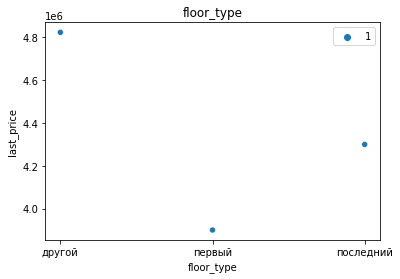


Расчёт для balcony

             balcony  last_price
balcony     1.000000    0.902883
last_price  0.902883    1.000000



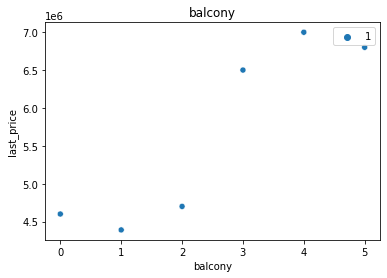

In [64]:
import seaborn

def find_corr (cor_row):
    for cor_column in cor_row:
        print('Расчёт для',cor_column)
        print()
        print(data.groupby(cor_column)['last_price'].agg('median').reset_index().corr())
        print()
        seaborn.scatterplot(x=data.groupby(cor_column)['last_price'].agg('median').reset_index()[cor_column], y=data.groupby(cor_column)['last_price'].agg('median').reset_index()['last_price'], hue = 1 )
        plt.title(cor_column)
        plt.show()
        print()
        
columns_for_corr = ['month','week_day','rooms','floor_type','balcony']        
find_corr (columns_for_corr)

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Найдем 10 наиболее активный населенных пунктов, а также населенные пункты с наболее высокой и низкой стоимостью квадратного метра. 

In [65]:
data_local = data.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc =  ['mean','count'])
data_local.columns = ['meter_price','count']

data_local_ten = data_local.sort_values(by = 'count', ascending = False).head(10)

display(data_local_ten.sort_values(by = 'meter_price', ascending = False))


,meter_price,count
locality_name,,
Санкт-Петербург,114067.115335,15649
Пушкин,103104.328065,367
Кудрово,95324.930508,472
Парголово,90103.136411,326
Мурино,86087.512017,590
Шушары,78677.364318,440
Колпино,75333.295816,337
Гатчина,68746.146515,307
Всеволожск,68670.553098,397


По данным выходит, что Санкт-Петербург является одним из самых активных населенных пунктов с точки зрения публикаций объявлений, замыкает десятку Выблорг. Самые дешевый квадратные метры по из топ-10 самых активных городов с точки зрения количества объявлений наиболее дорогие квадратные метры - у Санкт-Петербурга (123 720 р), самые дешевые - в Выборге (58 141 руб).

#### Оценим, как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге

Поскольку мы уже посчитали расстояние до центра в километрахб мы можем выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [ ]:
data_spb = data.query('locality_name=="Санкт-Петербург"').copy()

data_spb.groupby(data['distance_in_km'])['meter_price'].mean().plot(kind='bar',figsize = (15, 5))
plt.title('Cредняя цена каждого километра')
plt.show()


Видим, что наблюдается зависимость - чем дальше от центра города, тем дешевле стоит жилое помещение в перерасчете на квадратный метрю

### Общий вывод

Результаты проведенного исследования показывают, что данные по стоимости жилья достаточно разбросаны, как и дни, которые требуются, чтобы снять размещение.
выстраивается общее представление о типичной квартире, которую выставляют на сдачу.
Общая площадь сдваваемых квартир - обычно от 40 до 68.5 квадратных метров. Жилая площадь - от 18.6 до 42.3б а площадь кухни - от 7 до 12 квадратных метров. 

В объявлениях чаще фигурируют квартиры от 1 до 3х  комнат. Высота потолка - от 2.52 до 2 8 метров, этаж - от 2 до 8ой. Как правило, квартиры находятся в 9 - 16 км от центра и 18-37 км от аэропорта и 288-612 метров от центра. Сдают обычно с марта по октябрь.
Основное количество объявлений - со стоимостью между 3.4 млн и 6.8 млн.
У большинства пользователей на продажу уходит от 1,5 месяца до 7 месяцев. 
В данных заметна корреляция между стоимостью и годом, причем до 2017 года наблюдалось стабильное снижение, но после 2017 года - рост стоимости.
Прослеживается связь с днём недели (за исключением понедельника, который выбивается низкими показателями) - с ходом недели цена снижается.
Площадь зависит также влияет на стоимость: наибольшая связь между стоимостью и общей площадью, но также влияет и жилая площадь и площадь кухни.
Количество комнат также оказывает влияние на цену - видимо, в этот параметр незаметным образом "пролезает" и общая площадь, а также тип квартиры, рассчитанные на более высокие цены.
Та же картина наблюдается и с балконами - чем больше балконов, тем выше стоимость.
Наиболее активные пользователи в Санкт-Петербурге, но при этом есть населенный пункт с более высокими ценами.
По данным выходит, что Санкт-Петербург является одним из самых активных населенных пунктов с точки зрения публикаций объявлений, замыкает десятку Выблорг. Самые дешевый квадратные метры по из топ-10 самых активных городов с точки зрения количества объявлений наиболее дорогие квадратные метры - у Санкт-Петербурга (123 720 р), самые дешевые - в Выборге (58 141 руб).
В Санкт-Петербурге наблюдается связь между расстоянием до центра и стоимостью - чем ближе к центру, тем дороже.
